In [1]:
import io
import numpy as np 
from numpy import pi

import pydot 
from PIL import Image
import retworkx as rx

from qiskit import IBMQ, QuantumRegister, ClassicalRegister, QuantumCircuit, transpile

In [2]:
def create_qaoa_circuit() -> QuantumCircuit:
    """ taken from IBMQ Experience """
    qreg_q = QuantumRegister(3, 'q')
    circuit = QuantumCircuit(qreg_q)

    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.rz(-0.06942544294642758, qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.rz(-0.20827632883928274, qreg_q[0])
    circuit.rx(0.7530122052855767, qreg_q[0])
    circuit.h(qreg_q[2])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.rz(1.2496579730356965, qreg_q[1])
    circuit.cx(qreg_q[2], qreg_q[1])
    circuit.rz(-0.20827632883928274, qreg_q[1])
    circuit.rx(0.7530122052855767, qreg_q[1])
    circuit.rx(0.7530122052855767, qreg_q[2])
    
    return circuit

In [3]:
# transpile circuit for ibmq_belem
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend("ibmq_belem") 
conf = device.configuration()
print(conf.basis_gates)

['id', 'rz', 'sx', 'x', 'cx', 'reset']


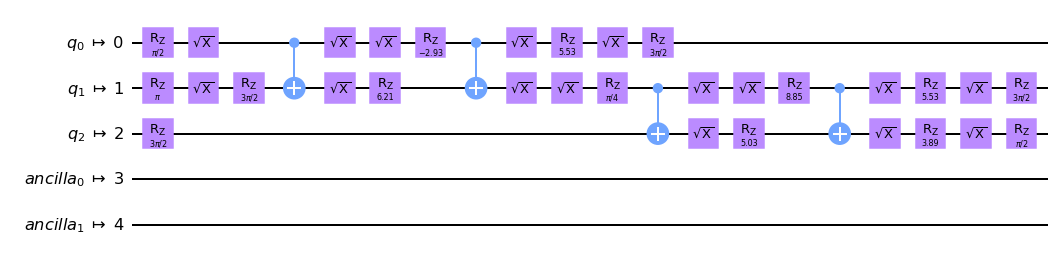

In [4]:
qc = create_qaoa_circuit()
circuit_transpiled = transpile(qc, backend=device, optimization_level=3)
circuit_transpiled.draw(output='mpl')

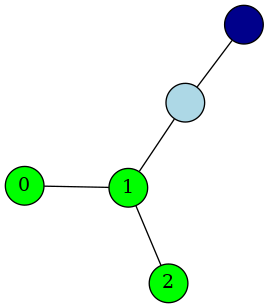

In [5]:
graph = rx.PyGraph(multigraph=False)
coupling_map = [tuple(edge) for edge in conf.coupling_map]
graph.add_nodes_from([i for i in range(5)])
graph.add_edges_from_no_data(coupling_map)
circuit_nodes = [0, 1, 2]
neighbor_nodes = [3]

def node_attr(node):
    kwargs = dict(style='filled', shape="circle", fontsize="14", fixedsize="true", width="0.4", height="0.4")
    if node in circuit_nodes:
        kwargs.update(fillcolor='green')
    elif node in neighbor_nodes:
        kwargs.update(fillcolor='lightblue', label="")
    else:
        kwargs.update(fillcolor='darkblue', label="")
    return kwargs

dot_str = graph.to_dot(node_attr)
dot = pydot.graph_from_dot_data(dot_str)[0]
png = dot.create_png(prog='neato')
Image.open(io.BytesIO(png))